Problem 1 part 1

In [ ]:
import numpy as np
x1 = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
x2 = np.array([1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0])
p = np.array([28.1,34.3,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])
m = np.matmul(p.transpose(),x1)/(np.matmul(x1.transpose(),x1))
print(m)



problem 1 part 2

In [ ]:
import torch as t
from torch.autograd import Variable
import math as m

x = np.linspace(0,1,num=11)
x = t.from_numpy(x)
p_exp = np.array([28.1,34.3,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])
p_exp = t.from_numpy(p_exp)
A = Variable(t.tensor([1.0, 1.0]), requires_grad=True)
err = []
a = 0.01
for i in range(11):
    p[i] = x[i]*t.exp(A[0]*((A[1]*(1-x[i])/(A[0]*x[i]+A[1]*(1-x[i]))))**2)*17.4637\
        +(1-x[i])*t.exp(A[1]*((A[0]*x[i])/(A[0]*x[i]+A[1]*(1-x[i]))**2))*28.8241
    loss = ((x[i]*t.exp(A[0]*((A[1]*(1-x[i])/(A[0]*x[i]+A[1]*(1-x[i]))))**2)*17.4637\
        +(1-x[i])*t.exp(A[1]*((A[0]*x[i])/(A[0]*x[i]+A[1]*(1-x[i]))**2))*28.8241)\
            -p_exp[i])**2
    loss.backward()
    with t.no_grad():
        A -= a*A.grad
        A.grad.zero_()
        
print(A.data.numpy())
print(loss.data.numpy())


problem 2

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
def sample_loss(x):
    return (4-2.1*x[0]**2+(x[0]**4)/3)*x[0]**2 + x[0]*x[1] + (-4+4*x[1]**2)*x[1]**2
x1 = np.linspace(-3, 3, 60)
x2 = np.linspace(-2, 2, 40)
param_grid = np.array([[y1,y2] for y2 in x2 for y1 in x1])
real_loss = [sample_loss(x) for x in param_grid]
param_grid[np.array(real_loss).argmax(),:]

from matplotlib import rc

rc('text', usetex=True)
X1, X2 = np.meshgrid(x1,x2)
plt.figure()
cp = plt.contourf(X1, X2, np.array(real_loss).reshape(X1.shape))
plt.colorbar(cp)
plt.title('Filled contours plot of loss function')
plt.xlabel('C')
plt.ylabel('gamma')
plt.show()

new approach to problem 2 using skopt

In [ ]:
print(__doc__)

import numpy as np
np.random.seed(237)
import matplotlib.pyplot as plt
from skopt.plots import plot_gaussian_process

noise_level = 0.1

def f(x1,x2, noise_level=noise_level):
    return (4-2.1*x[0]**2+(x[0]**4)/3)*x[0]**2 + x[0]*x[1] + (-4+4*x[1]**2)*x[1]**2\
           + np.random.randn() * noise_level

x1_i = np.linspace(-3, 3, 400).reshape(-1, 1)
x2_i = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx],
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()

new problem 2 approach building baynsian optmization from scratch

In [74]:
import numpy as np
import math as m
import matplotlib.pyplot as plt


def objective(x1,x2, noise=0.1):
    noise = np.random.normal(loc=0, scale=noise)
    return ((4-2.1*x1**2+(x1**4)/3)*x1**2 + x1*x2 + (-4+4*x2**2)*x2**2) + noise
X1 = np.linspace(-3,3,600)
X2 = np.linspace(-2,2,400)
f = np.array([objective(x1,x2,0) for x1 in X1 for x2 in X2])
f = np.array([objective(x1,x2,0.1) for x1 in X1 for x2 in X2])
ix = np.argmin(f)
z = np.unravel_index(ix,(600,400))
print(f[ix])
print(z)
print(X1[z[0]],X2[z[1]])



-1.0313994903674346
(290, 271)
-0.09515859766277135 0.7167919799498748


back to original approach

[-0.0395906   0.76237683]
0.9975327195045489


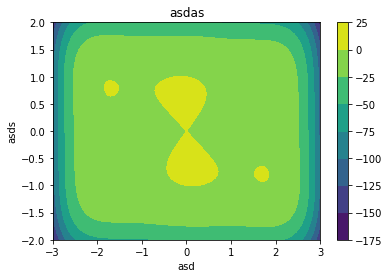

In [63]:
from gp import bayesian_optimisation
from plotters import plot_iteration

import numpy as np
import matplotlib.pyplot as plt


def sample_loss(x):
    return -((4-2.1*x[0]**2+(x[0]**4)/3)*x[0]**2 + x[0]*x[1] + (-4+4*x[1]**2)*x[1]**2)
X1 = np.linspace(-3,3,200)
X2 = np.linspace(-2,2,400)
param_grid = np.array([[x1,x2] for x2 in X2 for x1 in X1])
real_loss = [sample_loss(x) for x in param_grid]
param_grid[np.array(real_loss).argmin(),:]

x1,x2 = np.meshgrid(X1,X2)
plt.figure()
cp = plt.contourf(x1,x2, np.array(real_loss).reshape(x1.shape))
plt.colorbar(cp)
plt.title('asdas')
plt.xlabel('asd')
plt.ylabel('asds')
plt.show

bounds = np.array([[-3,3],[-2,2]])

xp,yp = bayesian_optimisation(n_iters=30,sample_loss=sample_loss,bounds=bounds,n_pre_samples=5,random_search=100000)

print(xp[-1])
print(yp[-1])

Final result of problem 2, bayesian optimization is not very good at accurately finding the minimum of the function but this one result was close enough to consider it successful